In [ ]:
import pandas as pd 

df = pd.read_parquet('df_final.parquet')

In [ ]:
df.head()

,id_votacao,id_parlamentar,id_parlamentar_parlametria,partido,voto,casa_x,id_proposicao,data,obj_votacao,casa_y,...,doacoes_OUTROS PRODUTOS INDUSTRIAIS_proporcao_doacao,"doacoes_PETRÓLEO, GÁS E CARVÃO MINERAL_total_por_atividade","doacoes_PETRÓLEO, GÁS E CARVÃO MINERAL_total_recebido_geral","doacoes_PETRÓLEO, GÁS E CARVÃO MINERAL_proporcao_doacao",doacoes_INDÚSTRIA DO FUMO_total_por_atividade,doacoes_INDÚSTRIA DO FUMO_total_recebido_geral,doacoes_INDÚSTRIA DO FUMO_proporcao_doacao,doacoes_SERVIÇOS DOMÉSTICOS_total_por_atividade,doacoes_SERVIÇOS DOMÉSTICOS_total_recebido_geral,doacoes_SERVIÇOS DOMÉSTICOS_proporcao_doacao
0,2179189-59,160645,1160645,PSDB,1,camara,2179189.0,2019-02-12 17:35:23,0,camara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2179189-45,160645,1160645,PSDB,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2183943-68,160645,1160645,PSDB,1,camara,2183943.0,2019-02-13 18:31:49,"Votação do art. 22, inserido no art. 6º da MPV...",camara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2083376-58,160645,1160645,PSDB,1,camara,2083376.0,2019-02-21 10:57:11,Votação em turno único.,camara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2192300-10,160645,1160645,PSDB,0,camara,2190880.0,2019-02-19 16:44:19,0,camara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.9 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
print(df.columns.values)

['id_votacao' 'id_parlamentar' 'id_parlamentar_parlametria' 'partido'
 'voto' 'casa_x' 'id_proposicao' 'data' 'obj_votacao' 'casa_y'
 'is_nominal' 'resumo' 'id' 'tema_Administração Pública'
 'tema_Agricultura, Pecuária, Pesca e Extrativismo'
 'tema_Arte, Cultura e Religião' 'tema_Cidades e Desenvolvimento Urbano'
 'tema_Ciência, Tecnologia e Inovação' 'tema_Ciências Exatas e da Terra'
 'tema_Ciências Sociais e Humanas' 'tema_Comunicações'
 'tema_Defesa e Segurança' 'tema_Direito Civil e Processual Civil'
 'tema_Direito Constitucional' 'tema_Direito Penal e Processual Penal'
 'tema_Direito e Defesa do Consumidor' 'tema_Direito e Justiça'
 'tema_Direitos Humanos e Minorias' 'tema_Economia' 'tema_Educação'
 'tema_Energia, Recursos Hídricos e Minerais' 'tema_Esporte e Lazer'
 'tema_Estrutura Fundiária' 'tema_Finanças Públicas e Orçamento'
 'tema_Homenagens e Datas Comemorativas'
 'tema_Indústria, Comércio e Serviços'
 'tema_Meio Ambiente e Desenvolvimento Sustentável'
 'tema_Política, Part

In [ ]:
#Creating the 
causal_graph = """
digraph {
voto;
partido;
U[label="Unobserved Confounders"];
partido -> voto;
"doacoes_MINERAÇÃO_total_recebido_geral" -> acoes_socioambiental
"tema_Meio Ambiente e Desenvolvimento Sustentável" -> acoes_socioambiental
acoes_socioambiental -> voto
U -> partido
U -> "doacoes_MINERAÇÃO_total_recebido_geral"
U -> "tema_Meio Ambiente e Desenvolvimento Sustentável"
}
"""

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


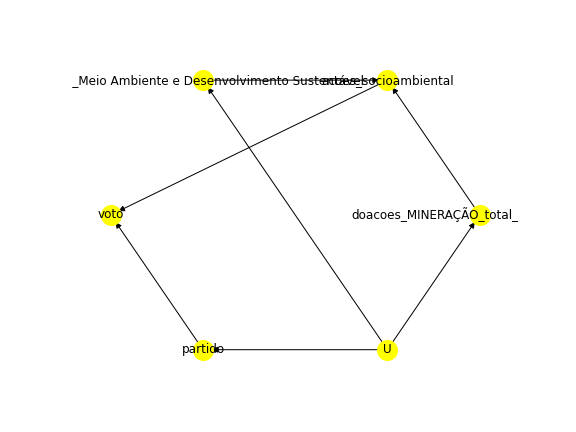

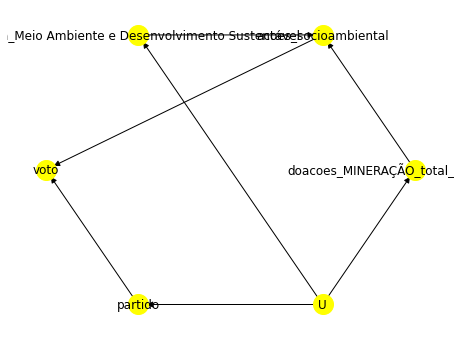

In [ ]:
import dowhy
from IPython.display import Image, display
model= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='partido',
        outcome='voto')
model.view_model()
display(Image(filename="causal_model.png"))

In [ ]:
# Estimate the effect
estimand = model.identify_effect()
print(estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                             
──────────(Expectation(voto|acoes_socioambiental))
d[partido]                                        
Estimand assumption 1, Unconfoundedness: If U→{partido} and U→voto then P(voto|partido,acoes_socioambiental,U) = P(voto|partido,acoes_socioambiental)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
import numpy as np

teste = df.copy()
non_numeric_columns = list(teste.select_dtypes(exclude=[np.number]).columns)
struct_data = teste[['voto', 'id_parlamentar', 'id_proposicao', 'id_votacao', 'is_nominal', 'partido', 'casa_x', 'casa_y']].copy()
print(non_numeric_columns)

['id_votacao', 'partido', 'casa_x', 'data', 'obj_votacao', 'casa_y', 'is_nominal', 'resumo']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
non_numeric_columns2 = ['id_votacao', 'partido', 'casa_x', 'casa_y', 'is_nominal']
for col in non_numeric_columns2:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,voto,id_parlamentar,id_proposicao,id_votacao,is_nominal,partido,casa_x,casa_y
0,1,160645,2179189.0,85,0,27,0,0
1,1,160645,2179189.0,84,0,27,0,0
2,1,160645,2183943.0,86,0,27,0,0
3,1,160645,2083376.0,30,0,27,0,0
4,0,160645,2190880.0,158,0,27,0,0


In [ ]:
struct_data.fillna(0, inplace=True)
struct_data.head(5)

,voto,id_parlamentar,id_proposicao,id_votacao,is_nominal,partido,casa_x,casa_y
0,1,160645,2179189.0,85,0,27,0,0
1,1,160645,2179189.0,84,0,27,0,0
2,1,160645,2183943.0,86,0,27,0,0
3,1,160645,2083376.0,30,0,27,0,0
4,0,160645,2190880.0,158,0,27,0,0


In [ ]:
!pip install causalnex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 6.8 MB/s 
     |████████████████████████████████| 76 kB 6.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 1.9 MB 44.0 MB/s 
     |████████████████████████████████| 27.4 MB 1.3 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 115 kB 73.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68724 sha256=d8eefa4256c5201f87941ba15450e57537d32bb5e5799d4f52ebf6c5fb33a1e7
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing inst

In [ ]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

OverflowError: ignored

In [ ]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [ ]:
sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

In [ ]:

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [ ]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, 'graph.dot') 

In [ ]:
from networkx import path_graph
from networkx.drawing.nx_pydot import to_pydot

dot = to_pydot(sm).to_string()
print(dot)

In [ ]:
import dowhy
from IPython.display import Image, display
model= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='partido',
        outcome='voto')
model.view_model()
display(Image(filename="causal_model.png"))